In [ ]:
pip install pandas matplotlib yfinance seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np

In [164]:
data = pd.read_csv('fiis_b3.csv')

In [165]:
data = data[data['Dividend Yield'] != 'N/A']
data = data[data['Dividend Yield'] != 'N/A %']
data = data[data['Dividend Yield'].str.len() < 7]
data['Dividend Yield'] = data['Dividend Yield'].str.replace('%', '').str.replace(',', '.').str.strip()
data['Dividend Yield'] = pd.to_numeric(data['Dividend Yield'])

data = data[data['Rentab. no mês'] != 'N/A']
data = data[data['Rentab. no mês'] != 'N/A %']
data['Rentab. no mês'] = data['Rentab. no mês'].str.replace('%', '').str.replace(',', '.').str.strip()
data['Rentab. no mês'] = pd.to_numeric(data['Rentab. no mês'])

data = data[data['P/VP'].str.len() < 7]
data['P/VP'] = data['P/VP'].str.replace('%', '').str.replace(',', '.').str.strip()
data['P/VP'] = pd.to_numeric(data['P/VP'])

data = data[data['Último Rendimento'].str.len() < 7]
data['Último Rendimento'] = data['Último Rendimento'].str.replace('%', '').str.replace(',', '.').str.strip()
data['Último Rendimento'] = pd.to_numeric(data['Último Rendimento'])

del data['Unnamed: 0.1']
del data['Unnamed: 0']

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 3 to 621
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nome                   151 non-null    object 
 1   Preco                  151 non-null    object 
 2   Liquidez Média Diária  151 non-null    object 
 3   Último Rendimento      151 non-null    float64
 4   Dividend Yield         151 non-null    float64
 5   Patrimônio Líquido     151 non-null    object 
 6   Valor Patrimonial      151 non-null    object 
 7   Rentab. no mês         151 non-null    float64
 8   P/VP                   151 non-null    float64
dtypes: float64(4), object(5)
memory usage: 11.8+ KB


In [167]:
data.head()

,Nome,Preco,Liquidez Média Diária,Último Rendimento,Dividend Yield,Patrimônio Líquido,Valor Patrimonial,Rentab. no mês,P/VP
3,ABCP11,"R$ 69,99","77,4 K",0.65,9.27,"R$ 432,7 M","R$ 91,88",0.57,0.76
15,ALZR11,"R$ 119,15","1,6 M",0.83,8.31,"R$ 1,1 B","R$ 106,95",0.97,1.10
17,ANCR11B,"R$ 3.221,00","5,1 K",42.08,1.96,"R$ 1,9 B","R$ 3.941,72",-2.39,0.82
19,APXM11,"R$ 102,99","1,3 M",0.60,1.92,"R$ 168,9 M","R$ 95,98",0.98,1.07
23,AROA11,"R$ 3,58","71,4 K",0.01,1.58,"R$ 178,6 M","R$ 1,06",28.32,2.63


In [168]:
data = data[data['Dividend Yield'] > 6]

data = data[data['P/VP'] < 1.3]

data = data[data['Rentab. no mês'] > 0]	

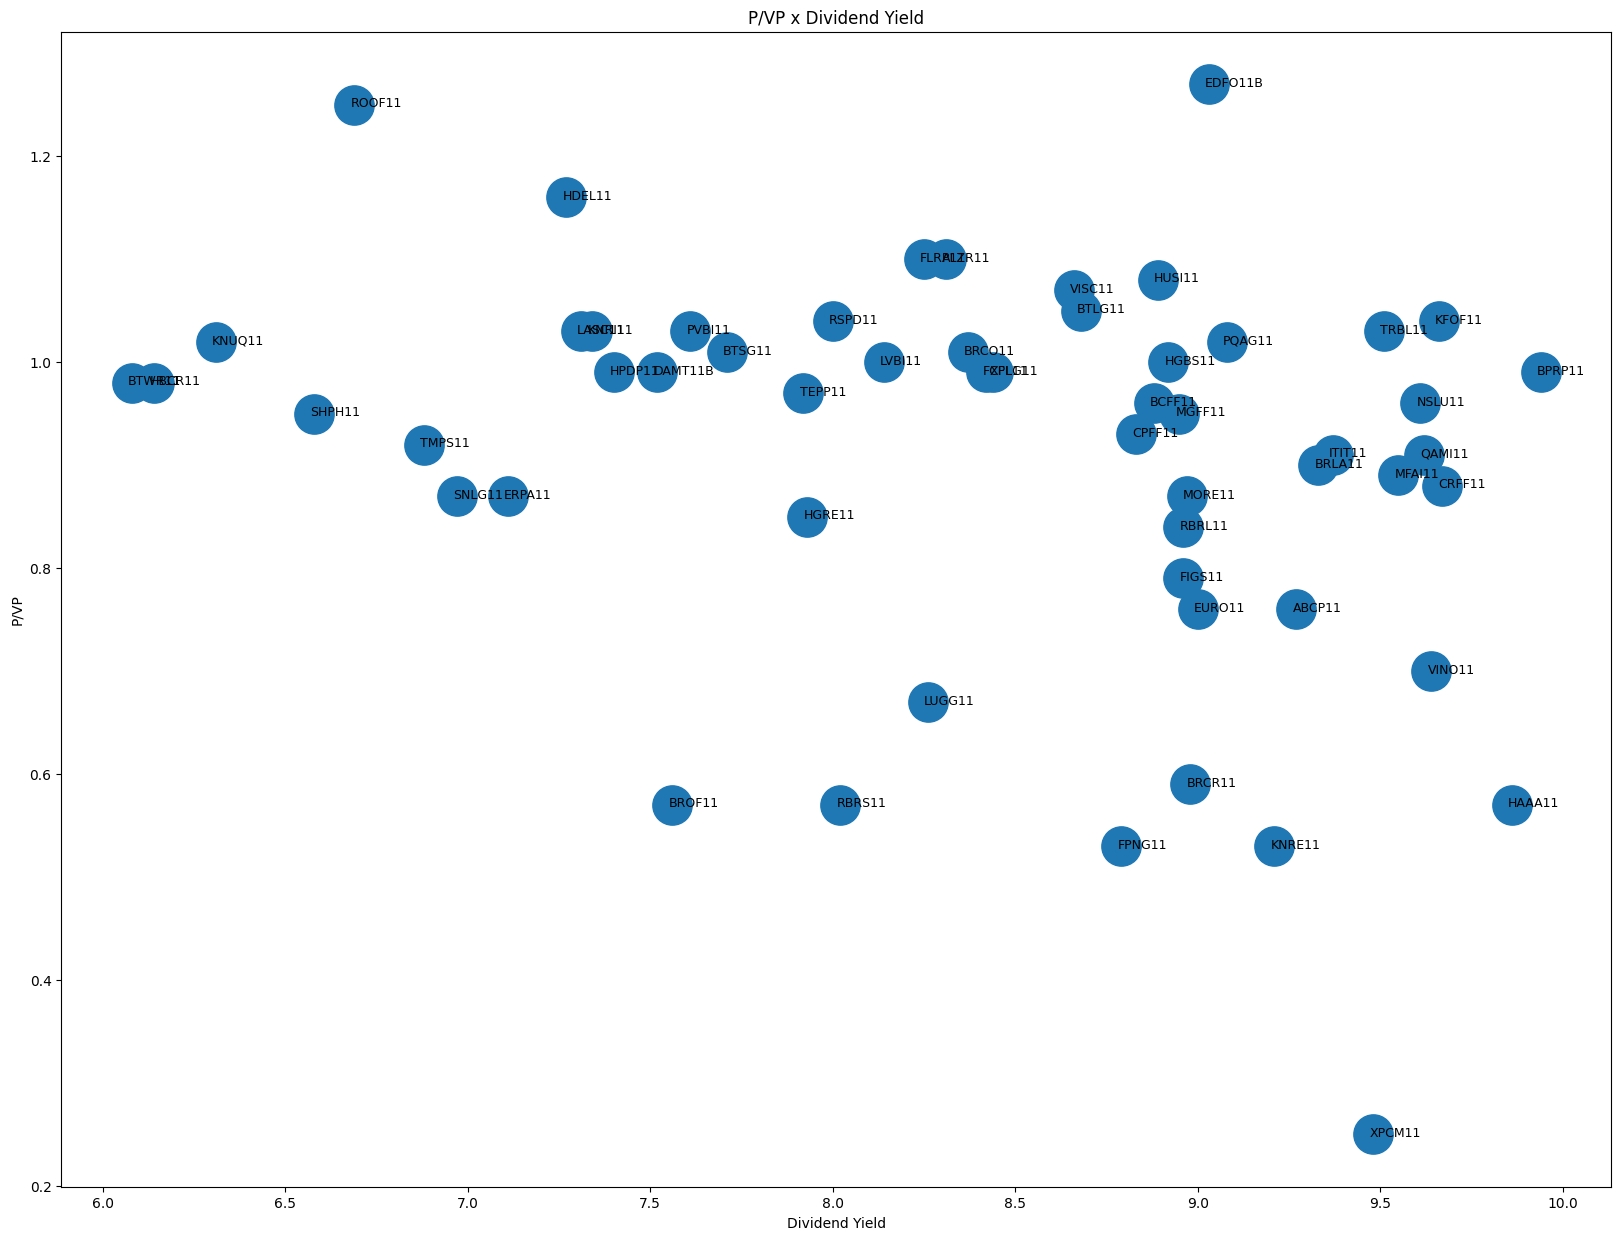

In [169]:
fig, ax = plt.subplots(figsize=(20, 15))

plt.scatter(data['Dividend Yield'], data['P/VP'], s=800)

plt.xlabel('Dividend Yield')
plt.ylabel('P/VP')
plt.title('P/VP x Dividend Yield')

for i in data.index:
    plt.annotate(data.loc[i, 'Nome'], xy=(data.loc[i, 'Dividend Yield'] - 0.01, data.loc[i, 'P/VP'] - 0.002), size=9)

plt.show()

In [170]:
data = data.sort_values(by=['Dividend Yield','P/VP','Rentab. no mês','Último Rendimento'], ascending=[False,True,False,False])
data = data[['Nome','Preco','Dividend Yield','P/VP','Rentab. no mês','Último Rendimento']]

In [171]:
data

,Nome,Preco,Dividend Yield,P/VP,Rentab. no mês,Último Rendimento
70,BPRP11,"R$ 108,99",9.94,0.99,14.61,0.90
231,HAAA11,"R$ 48,02",9.86,0.57,5.49,0.37
125,CRFF11,"R$ 77,92",9.67,0.88,0.43,0.65
307,KFOF11,"R$ 99,50",9.66,1.04,0.20,1.03
572,VINO11,"R$ 7,58",9.64,0.70,0.13,0.06
434,QAMI11,"R$ 84,68",9.62,0.91,10.17,1.00
379,NSLU11,"R$ 192,98",9.61,0.96,0.01,1.55
350,MFAI11,"R$ 62,09",9.55,0.89,0.18,0.55
544,TRBL11,"R$ 98,30",9.51,1.03,0.15,0.72
605,XPCM11,"R$ 10,15",9.48,0.25,0.20,0.02


In [172]:
data['yahoo_name'] = data['Nome'] + '.SA'

In [173]:
yf.download(data['yahoo_name'].tolist(), start = "2016-01-01", end = "2023-12-30").to_csv('yahoo_fiis.csv')

[*********************100%%**********************]  56 of 56 completed


In [174]:
fiis = pd.read_csv('yahoo_fiis.csv', header=[0,1],index_col=[0],parse_dates=[0])

In [175]:
fiis.head()

Adj Close                                                     \
            ABCP11.SA ALZR11.SA BCFF11.SA BPRP11.SA BRCO11.SA  BRCR11.SA   
Date                                                                       
2016-01-04  39.921032       NaN  0.961719       NaN       NaN  75.626434   
2016-01-05  39.921032       NaN  0.958374       NaN       NaN  76.006226   
2016-01-06  37.861935       NaN  0.961719       NaN       NaN  75.543877   
2016-01-07  37.861935       NaN  0.958374       NaN       NaN  74.024757   
2016-01-08  39.080570       NaN  0.961719       NaN       NaN  73.479858   

                                                     ...    Volume            \
           BRLA11.SA BROF11.SA  BTLG11.SA BTSG11.SA  ... RSPD11.SA SHPH11.SA   
Date                                                 ...                       
2016-01-04       NaN       NaN  56.784992       NaN  ...       NaN         0   
2016-01-05       NaN       NaN  54.242378       NaN  ...       NaN         0   
2016-01-06       NaN       NaN  54.666142       NaN  ...       NaN         4   
2016-01-07       NaN       NaN  53.428745       NaN  ...       NaN        21   
2016-01-08       NaN       NaN  54.072868       NaN  ...       NaN        40   

                                                                        \
           SNLG11.SA TEPP11.SA TMPS11.SA TRBL11.SA VINO11.SA VISC11.SA   
Date                                                                     
2016-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2016-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2016-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2016-01-07       NaN       NaN       NaN       NaN       NaN       NaN   
2016-01-08       NaN       NaN       NaN       NaN       NaN       NaN   

                                
           XPCM11.SA XPLG11.SA  
Date                            
2016-01-04      1752       NaN  
2016-01-05      2057       NaN  
2016-01-06      2903       NaN  
2016-01-07      2121       NaN  
2016-01-08      1392       NaN  

[5 rows x 336 columns]

In [176]:
fiis.describe()

Adj Close                                                    \
         ABCP11.SA    ALZR11.SA    BCFF11.SA   BPRP11.SA   BRCO11.SA   
count  1990.000000  1484.000000  1721.000000  959.000000  960.000000   
mean     66.001537    96.968606     5.570650   90.053116   97.565384   
std      11.717633    11.632920     1.951887    7.051298   11.974019   
min      37.861935    69.901451     0.927397   75.166748   72.360207   
25%      61.174975    86.625565     4.877322   84.262077   87.002302   
50%      66.174736    98.382133     5.729999   88.499969   95.399334   
75%      70.444889   106.530579     7.025778   94.712238  106.214104   
max      93.383217   124.711006     9.426923  108.989998  125.597031   

                                                                     ...  \
         BRCR11.SA   BRLA11.SA   BROF11.SA    BTLG11.SA   BTSG11.SA  ...   
count  1990.000000  126.000000  183.000000  1990.000000   63.000000  ...   
mean     73.045816  143.227399   62.514463    77.217676  120.005020  ...   
std      11.217061    7.265637    4.050979    18.301475   23.156028  ...   
min      47.587444  117.746162   52.333370    40.512264   49.735790  ...   
25%      62.365556  139.731979   59.665840    59.398162   97.748066  ...   
50%      75.699341  141.686249   64.256218    87.418621  135.105713  ...   
75%      80.826399  146.571991   65.960449    91.302647  139.000000  ...   
max     102.799751  162.074997   67.143158   103.870003  147.730072  ...   

            Volume                                                         \
         RSPD11.SA    SHPH11.SA     SNLG11.SA      TEPP11.SA    TMPS11.SA   
count   959.000000  1990.000000    586.000000     909.000000   162.000000   
mean      4.828989   125.373869   1783.107509    8030.311331   718.592593   
std     127.318654   216.638323   2983.170127   13062.756261   749.830768   
min       0.000000     0.000000      1.000000     284.000000     0.000000   
25%       0.000000    26.000000    615.500000    2936.000000   166.750000   
50%       0.000000    60.000000   1063.500000    4773.000000   516.000000   
75%       0.000000   136.750000   1978.500000    7629.000000  1074.250000   
max    3918.000000  2971.000000  50000.000000  247748.000000  3607.000000   

                                                                               
          TRBL11.SA     VINO11.SA      VISC11.SA     XPCM11.SA      XPLG11.SA  
count    129.000000  1.014000e+03    1530.000000    1990.00000     888.000000  
mean    9212.612403  1.819871e+05   30042.318301    7581.29196   51530.413288  
std     4677.274325  1.039501e+05   28365.554854   10635.51248   36396.054669  
min     3127.000000  5.874500e+04       0.000000       0.00000   18146.000000  
25%     6055.000000  1.210025e+05   19601.750000    2656.00000   33573.250000  
50%     8107.000000  1.572225e+05   24745.000000    4688.00000   43595.500000  
75%    11106.000000  2.079382e+05   33277.000000    8886.25000   59699.000000  
max    29806.000000  1.045252e+06  870250.000000  173168.00000  706298.000000  

[8 rows x 336 columns]

In [ ]:
close = fiis.loc[:,'Close'].copy()
ret = close.pct_change().dropna()

In [178]:
ret.describe()

,ABCP11.SA,ALZR11.SA,BCFF11.SA,BPRP11.SA,BRCO11.SA,BRCR11.SA,BRLA11.SA,BROF11.SA,BTLG11.SA,BTSG11.SA,...,RSPD11.SA,SHPH11.SA,SNLG11.SA,TEPP11.SA,TMPS11.SA,TRBL11.SA,VINO11.SA,VISC11.SA,XPCM11.SA,XPLG11.SA
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.000471,0.000758,0.002313,0.003917,-0.000072,0.002850,0.000122,-0.000101,0.001057,-0.000011,...,-0.003616,0.001642,-0.003280,0.000836,-0.000335,-0.000037,0.000095,0.001410,0.000054,0.000519
std,0.006895,0.004498,0.015764,0.029026,0.011924,0.016192,0.024017,0.018100,0.005307,0.002153,...,0.025645,0.017986,0.020665,0.011804,0.013939,0.004826,0.017934,0.004755,0.018684,0.008778
min,-0.018315,-0.010464,-0.023158,-0.049900,-0.041296,-0.045000,-0.100000,-0.045498,-0.010520,-0.006576,...,-0.155875,-0.052637,-0.053796,-0.029390,-0.056800,-0.010932,-0.061358,-0.009680,-0.064576,-0.032778
25%,-0.001662,-0.001284,-0.007960,0.000000,-0.005263,-0.004162,0.000000,-0.008894,-0.001510,0.000000,...,0.000000,-0.002152,-0.011896,-0.004713,-0.004933,-0.002740,-0.008527,-0.001324,-0.007556,-0.002724
50%,0.000361,0.000348,0.001581,0.000000,0.000451,0.002296,0.000000,0.000172,0.001360,0.000000,...,0.000000,0.000000,-0.002821,-0.001013,-0.000328,-0.000769,-0.001301,0.000808,-0.000981,0.000369
75%,0.004690,0.003539,0.008044,0.000000,0.006286,0.007648,0.000000,0.013550,0.002924,0.000000,...,0.000000,0.005816,0.009507,0.004734,0.003870,0.003355,0.010499,0.003565,0.004898,0.004499
max,0.015303,0.011348,0.059086,0.147263,0.023629,0.048732,0.063491,0.034284,0.015439,0.011056,...,0.041667,0.079879,0.040385,0.037618,0.033551,0.012009,0.057299,0.018434,0.058594,0.027364


In [179]:
summary = ret.describe().T.loc[:, ['std']]
summary['std'] = summary['std']*np.sqrt(252)

In [180]:
summary.head()

,std
ABCP11.SA,0.109455
ALZR11.SA,0.071400
BCFF11.SA,0.250242
BPRP11.SA,0.460766
BRCO11.SA,0.189281


In [181]:
summary['std']

ABCP11.SA     0.109455
ALZR11.SA     0.071400
BCFF11.SA     0.250242
BPRP11.SA     0.460766
BRCO11.SA     0.189281
BRCR11.SA     0.257044
BRLA11.SA     0.381262
BROF11.SA     0.287327
BTLG11.SA     0.084253
BTSG11.SA     0.034181
BTWR11.SA     0.070049
CPFF11.SA     0.147066
CRFF11.SA     0.259645
DAMT11B.SA    0.830140
EDFO11B.SA    0.000000
ERPA11.SA     0.265057
EURO11.SA     0.101865
FCFL11.SA     0.151431
FIGS11.SA     0.111307
FLRP11.SA     0.303339
FPNG11.SA     0.026770
HAAA11.SA     0.518563
HBCR11.SA     0.015945
HDEL11.SA     0.032555
HGBS11.SA     0.081017
HGRE11.SA     0.189190
HPDP11.SA     0.257691
HUSI11.SA     0.584186
ITIT11.SA     0.093229
KFOF11.SA     0.124979
KNRE11.SA     0.864645
KNRI11.SA     0.123168
KNUQ11.SA     0.071010
LASC11.SA     0.109276
LUGG11.SA     0.107987
LVBI11.SA     0.158321
MFAI11.SA     0.199778
MGFF11.SA     0.161545
MORE11.SA     0.185720
NSLU11.SA     0.238130
PQAG11.SA     0.120825
PVBI11.SA     0.115105
QAMI11.SA     0.061682
RBRL11.SA  

In [182]:
financial_data = data.merge(summary[['std']], left_on='yahoo_name', right_index=True, how='left')
financial_data = financial_data.sort_values(by=['Dividend Yield','std','P/VP','Rentab. no mês','Último Rendimento'], ascending=[False,True,True,False,False])

In [183]:
financial_data

,Nome,Preco,Dividend Yield,P/VP,Rentab. no mês,Último Rendimento,yahoo_name,std
70,BPRP11,"R$ 108,99",9.94,0.99,14.61,0.90,BPRP11.SA,0.460766
231,HAAA11,"R$ 48,02",9.86,0.57,5.49,0.37,HAAA11.SA,0.518563
125,CRFF11,"R$ 77,92",9.67,0.88,0.43,0.65,CRFF11.SA,0.259645
307,KFOF11,"R$ 99,50",9.66,1.04,0.20,1.03,KFOF11.SA,0.124979
572,VINO11,"R$ 7,58",9.64,0.70,0.13,0.06,VINO11.SA,0.284689
434,QAMI11,"R$ 84,68",9.62,0.91,10.17,1.00,QAMI11.SA,0.061682
379,NSLU11,"R$ 192,98",9.61,0.96,0.01,1.55,NSLU11.SA,0.238130
350,MFAI11,"R$ 62,09",9.55,0.89,0.18,0.55,MFAI11.SA,0.199778
544,TRBL11,"R$ 98,30",9.51,1.03,0.15,0.72,TRBL11.SA,0.076604
605,XPCM11,"R$ 10,15",9.48,0.25,0.20,0.02,XPCM11.SA,0.296596


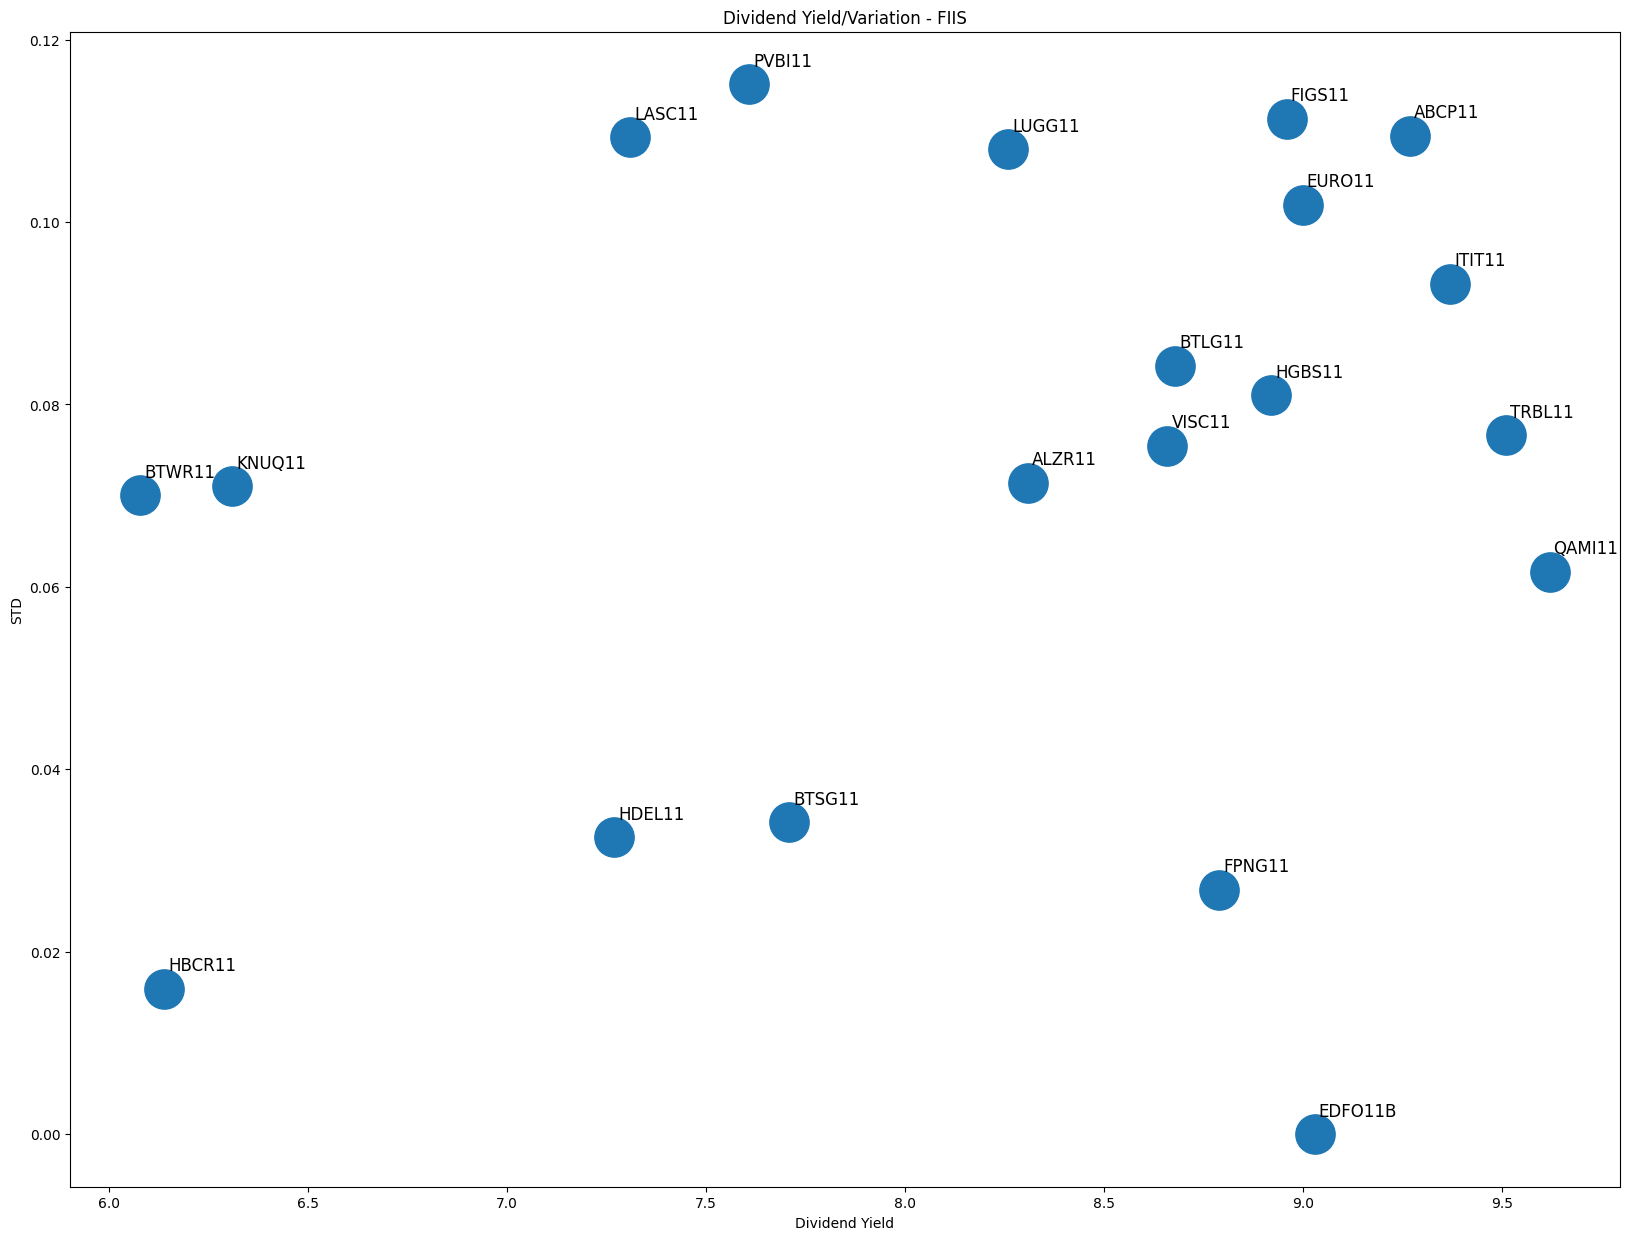

In [187]:
while(financial_data['Nome'].count() > 30):
    financial_data = financial_data[financial_data['std'] < financial_data['std'].mean()]

fig, ax = plt.subplots(figsize=(20, 15))

plt.scatter(financial_data['Dividend Yield'], financial_data['std'], s=800)

plt.xlabel('Dividend Yield')
plt.ylabel('STD')
plt.title('Dividend Yield/Variation - FIIS')

for i in financial_data.index:
    plt.annotate(financial_data.loc[i, 'Nome'], xy=(financial_data.loc[i, 'Dividend Yield'] + 0.01, financial_data.loc[i, 'std'] + 0.002), size=12)

plt.show()

In [188]:
financial_data

,Nome,Preco,Dividend Yield,P/VP,Rentab. no mês,Último Rendimento,yahoo_name,std
434,QAMI11,"R$ 84,68",9.62,0.91,10.17,1.00,QAMI11.SA,0.061682
544,TRBL11,"R$ 98,30",9.51,1.03,0.15,0.72,TRBL11.SA,0.076604
288,ITIT11,"R$ 77,18",9.37,0.91,0.53,0.64,ITIT11.SA,0.093229
3,ABCP11,"R$ 69,99",9.27,0.76,0.57,0.65,ABCP11.SA,0.109455
149,EDFO11B,"R$ 229,98",9.03,1.27,20.38,1.69,EDFO11B.SA,0.000000
165,EURO11,"R$ 248,75",9.00,0.76,0.26,1.88,EURO11.SA,0.101865
184,FIGS11,"R$ 60,60",8.96,0.79,0.35,0.45,FIGS11.SA,0.111307
247,HGBS11,"R$ 227,74",8.92,1.00,1.04,2.00,HGBS11.SA,0.081017
203,FPNG11,"R$ 85,07",8.79,0.53,0.10,0.54,FPNG11.SA,0.026770
89,BTLG11,"R$ 104,32",8.68,1.05,0.60,0.76,BTLG11.SA,0.084253
